In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, LinearSVC
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Downloads/credit_scoring_sample.csv')
filtered_data = data[data["NumberOfTime30-59DaysPastDueNotWorse"] < 90]
filtered_data = filtered_data[filtered_data['NumberOfTime30-59DaysPastDueNotWorse'] < 90]
filtered_data = filtered_data[filtered_data['NumberOfTimes90DaysLate'] < 90]
filtered_data = filtered_data[filtered_data['DebtRatio'] < 10000]
filtered_data = filtered_data[filtered_data['MonthlyIncome'] < 100000]
X = filtered_data.fillna(data.median())
y = X.pop('SeriousDlqin2yrs')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=100)

In [ ]:
svc1 = SVC(kernel='poly', C=1000, gamma=1, degree=2, max_iter=-1)
svc1.fit(X_train, y_train)
svc1.score(X_test, y_test)

score=0.807637826505751
auc=0.7376964675386379


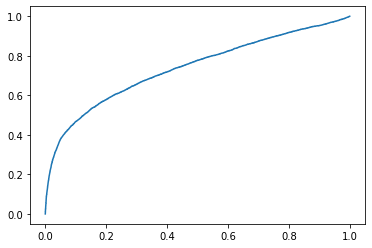

In [5]:
svc2 = SVC(kernel='linear', C=1, gamma=1, max_iter=-1)
svc2.fit(X_train, y_train)
print('score={}'.format(svc2.score(X_test, y_test)))
pred = svc2.decision_function(X_test)
pred = pred/max(pred)
fpr, tpr, _ = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)
print('auc={}'.format(auc))
plt.plot(fpr, tpr)

In [ ]:
#pred = svc1.predict_proba(X_test)[:, 1]
pred = svc1.decision_function(X_test)
pred = pred/max(pred)
fpr, tpr, _ = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)
print(auc)
plt.plot(fpr, tpr)

In [ ]:
#pred = svc1.predict_proba(X_test)[:, 1]
pred = svc2.decision_function(X_test)
pred = pred/max(pred)
fpr, tpr, _ = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)
print(auc)
plt.plot(fpr, tpr)